# ESCITATORY VS INHIBITORY NEURAL CONNECTION

In this simulation we are going to watch what happens if we connect two neurons and change the connection to be inhibitory or excitatory.

The model that will be used is the Simple Euler Method, so we first implement the function and set the parametters
The two neurons will start at different voltages to later see the effects of changing the connection

In [1]:
%matplotlib inline
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import scipy.integrate
import scipy
plt.rcParams['figure.dpi']= 300

# Parameter definitions
V_rest = -70 # mV
V_reset= -80 # mV
R_m    =  10 # Mohm
tau_m  =  10 # ms
V_th   = -54 # mV
I      =  1.7 # nA
T      = 300
gmax   = 50 #nS
tau_s  = 5.4
EsE    = 0 #mV
EsI    = -80 #mV
tau_p  = 2.5
P_max  = .0001


V = np.zeros(T)
V[0] = V_rest
V2 = np.zeros(T)
V2[0] = V_reset
neurons = [V, V2]
#neurons[1][0] = 50

# Euler method

def AMPA(t):
    return np.e**-(t/tau_s)
def GABA(t):
    return (t/tau_p)*np.e**(1-(t/tau_p))

def gateP (t, iSpks):
    if(len(iSpks) > 0):
        return gmax*GABA(t - iSpks[-1])*P_max
    else:
        return gmax*0

def eulerMeth(option, V_rest1 = V_rest, V_reset1 = V_reset, R_m1 = R_m, tau_m1 = tau_m, V_th1 = V_th, I1 = I, T1 = T, I_E = 0):
    tau_gsra = 100
    spikes = [[], []]
    for i in range(1,T1):
        for num, neuron in enumerate(neurons):
            dV1 = V_rest1 - neuron[i-1] + R_m1*I1
            if(option == 1):
                dV1 -= gateP(i, spikes[(num+1)%2])*(neuron[i - 1] - I_E)*R_m1
            neuron[i] = neuron[i-1] + dV1/tau_m1

            if neuron[i] > V_th1:
                neuron[i-1] = 50
                neuron[i] = V_reset1
                spikes[num].append(i)

    return neurons



First we want to see what the normal behaviour of the two neurons are if we give them a constant current $I$:

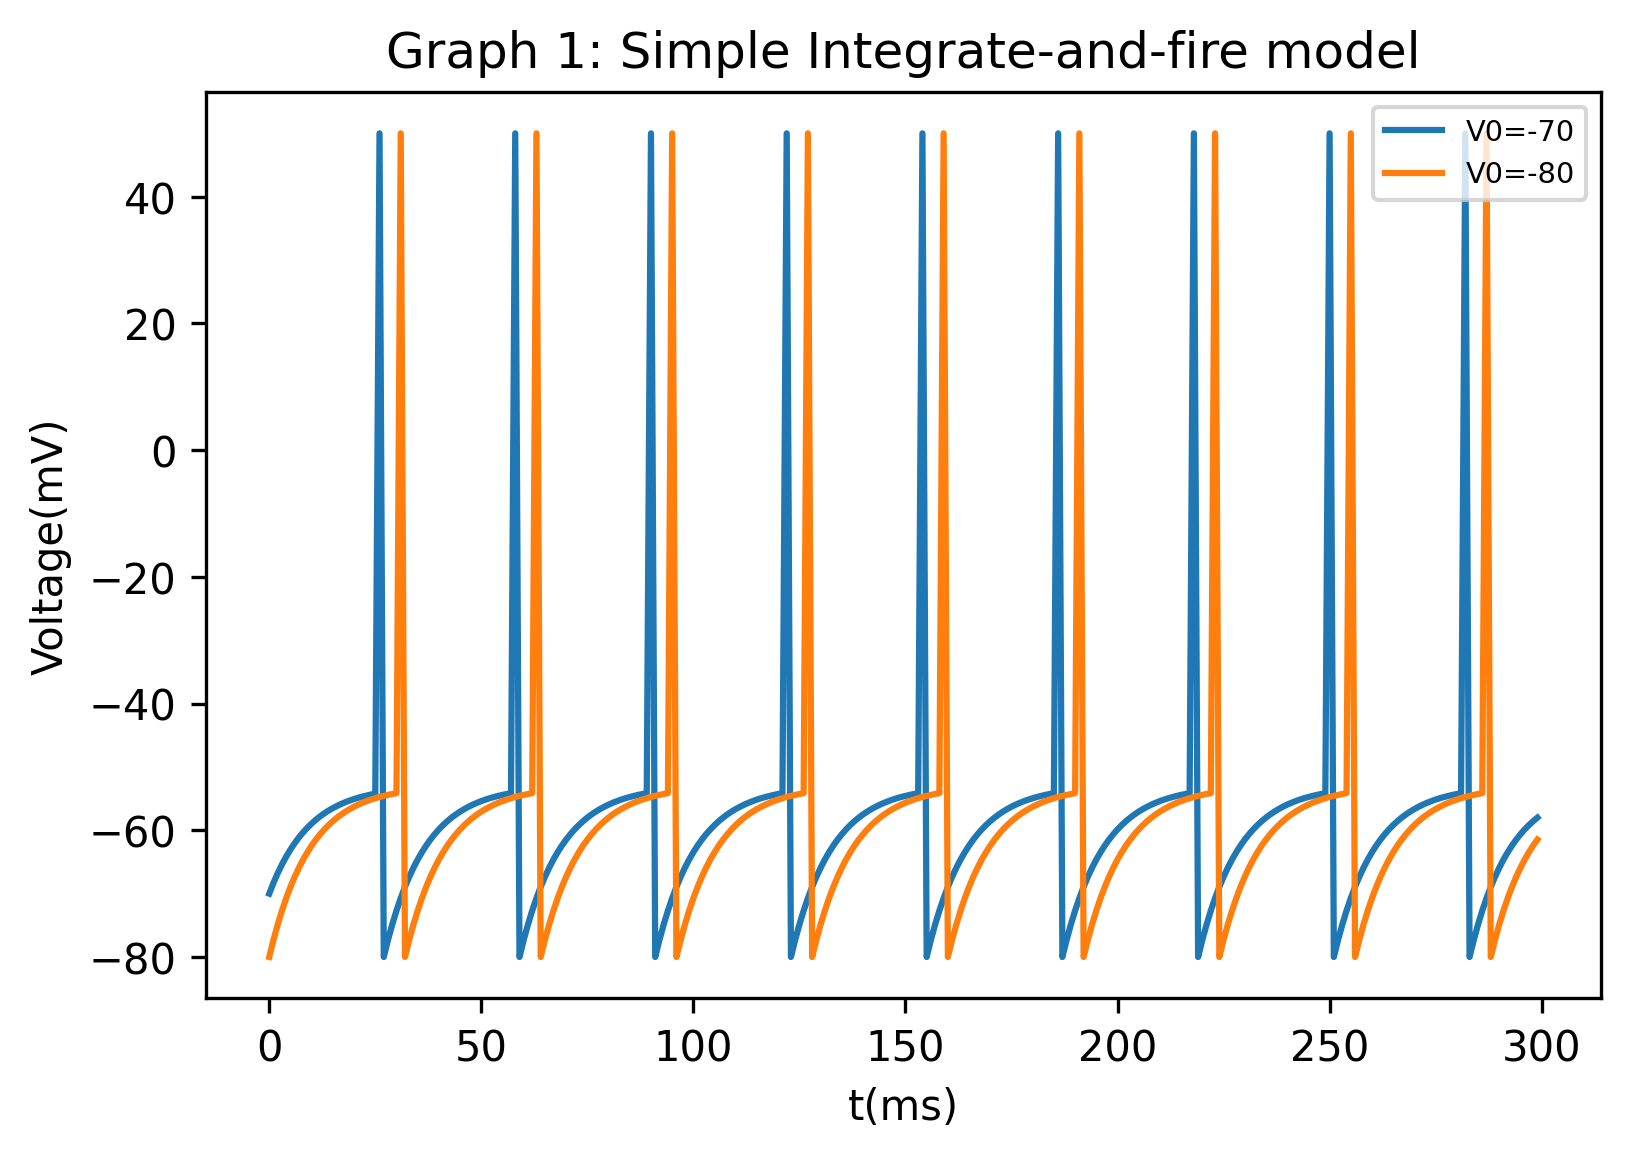

In [2]:
fig, ax = plt.subplots(1, 1)
ax.plot(eulerMeth(0)[0],  label='V0=-70')
ax.plot(eulerMeth(0)[1],  label='V0=-80')
ax.set_title('Graph 1: Simple Integrate-and-fire model')
ax.set_xlabel('t(ms)')
ax.set_ylabel('Voltage(mV)')
ax.legend(fontsize = 'x-small', loc='upper right');


We see how the change in starting voltage translates to a slight delay between the two spikes, which have the same firing rate beacuse the constant current is the same for both neurons

We now will connect both neurons with an excitatory voltage.

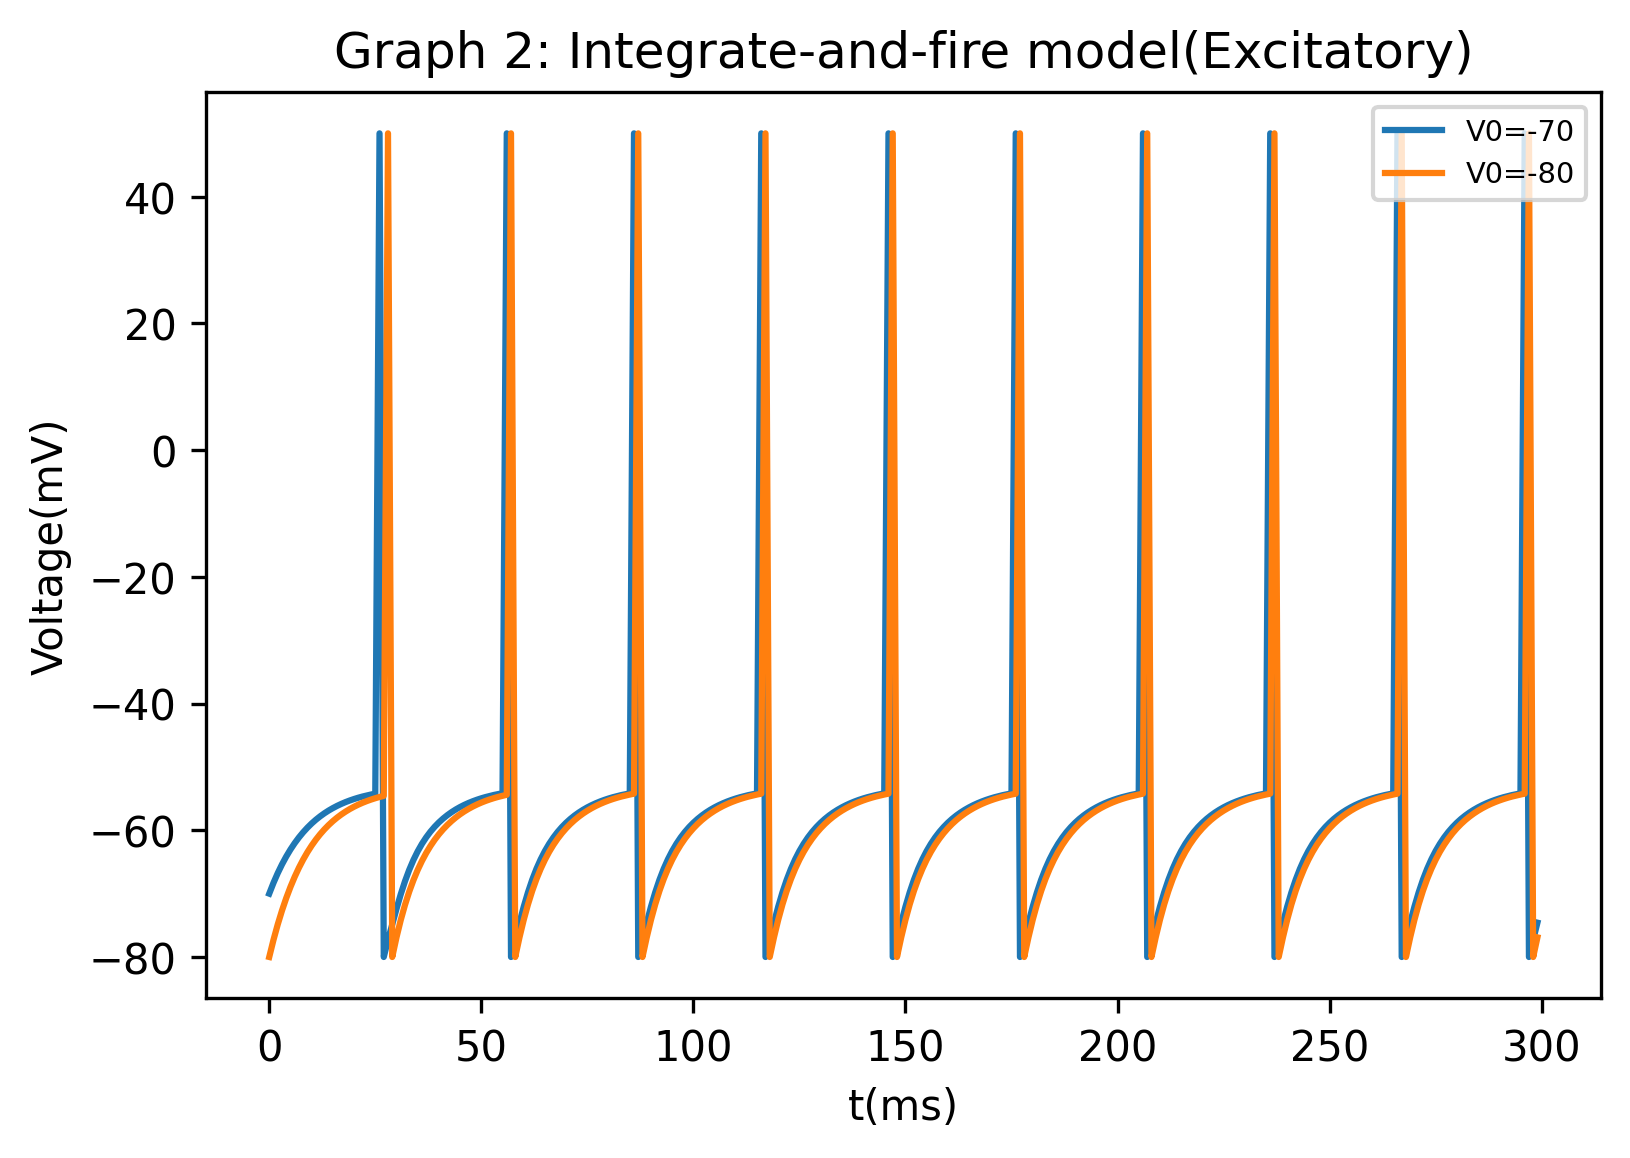

In [3]:
fig, ax = plt.subplots(1, 1)
neurons = [V, V2]
n = eulerMeth(1, I_E = EsE)

ax.plot(n[0],  label='V0=-70')
ax.plot(n[1],  label='V0=-80')
ax.set_title('Graph 2: Integrate-and-fire model(Excitatory)' )
ax.set_xlabel('t(ms)')
ax.set_ylabel('Voltage(mV)')
ax.legend(fontsize = 'x-small', loc='upper right');

We can see how the excitatory connection has translated into a syncrony of spiking beacuse each neuron increases the voltage of the other neuron when spiking.

Let's see what happens if we set the connection to be inhibitory

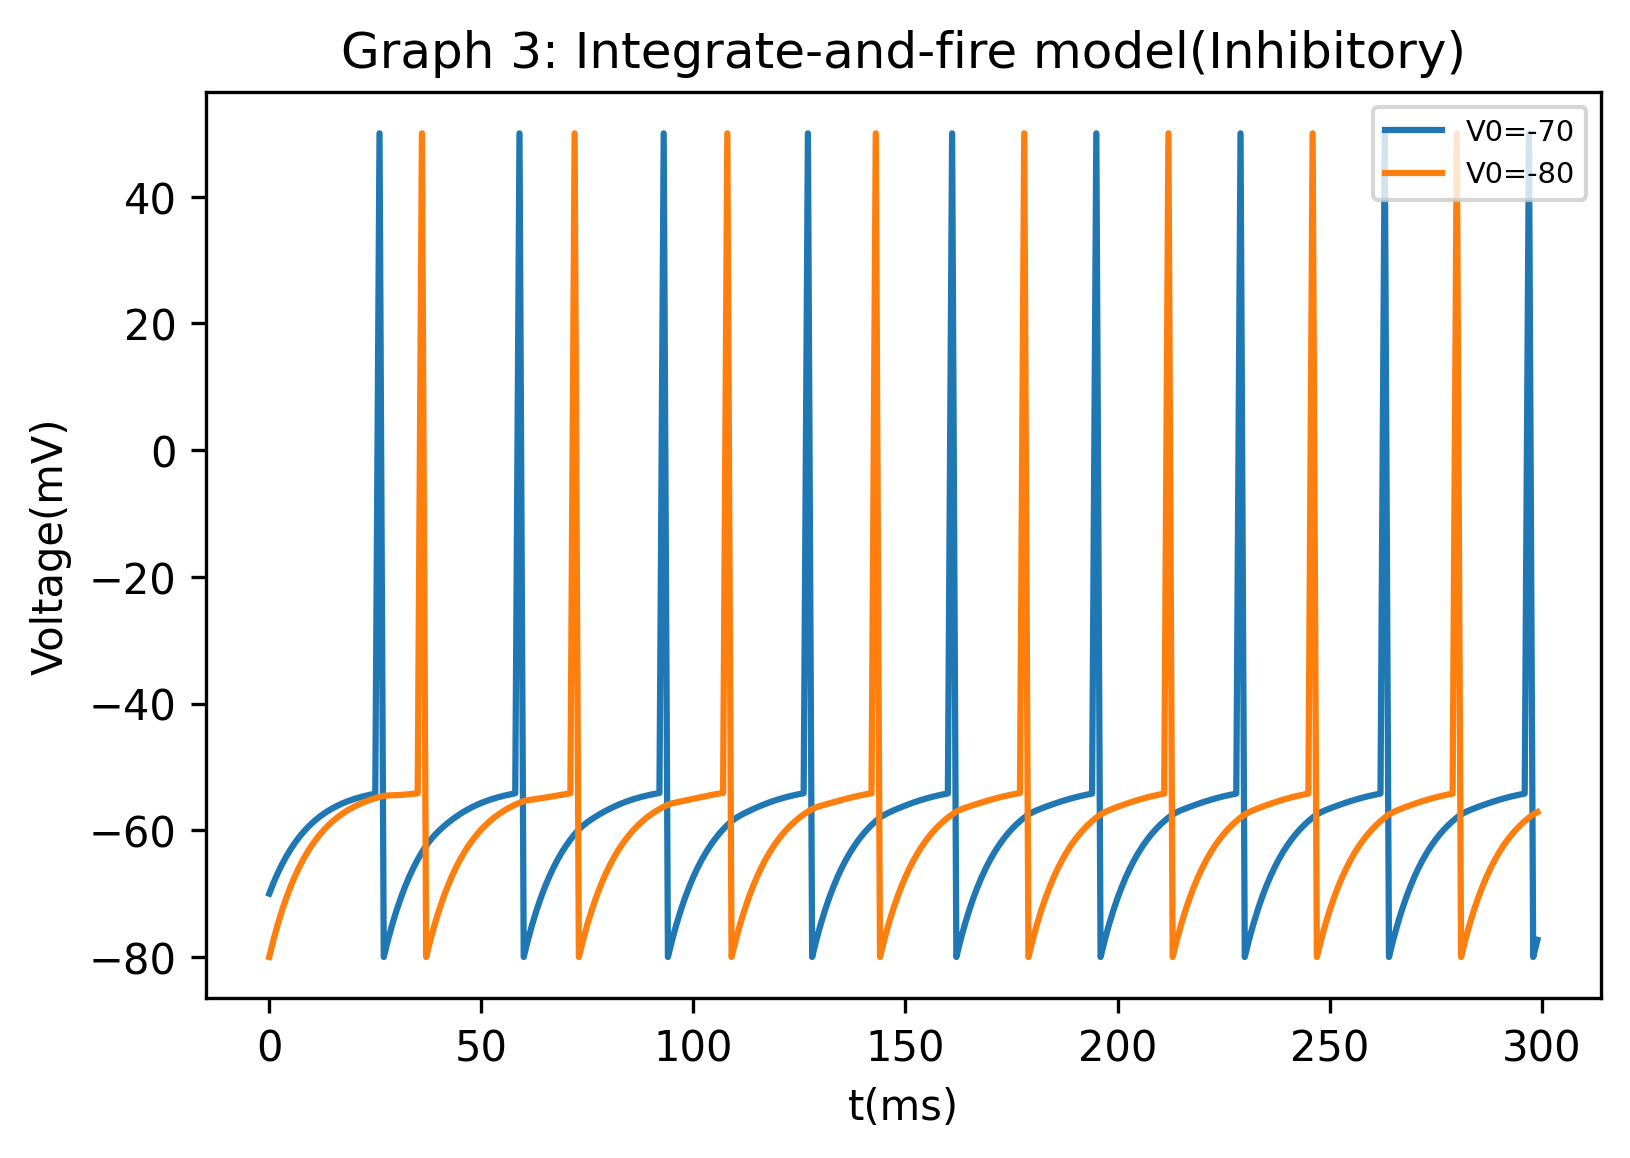

In [4]:
fig, ax = plt.subplots(1, 1)
eurons = [V, V2]
n = eulerMeth(1, I_E = EsI)

ax.plot(n[0],  label='V0=-70')
ax.plot(n[1],  label='V0=-80')
ax.set_title('Graph 3: Integrate-and-fire model(Inhibitory)')
ax.set_xlabel('t(ms)')
ax.set_ylabel('Voltage(mV)')
ax.legend(fontsize = 'x-small', loc='upper right');

Finally we can see how inhibitory connections translate to alternating spiking, the reason being that when a spike is given, the likelihood of the other neuron spiking as well decreases.